## Introduction

Word Embeddings are used to represent words in a multi-dimensional vector form. A word <span class="math"><b>w<sub>i</sub></b></span> in vocabulary **V** is represented in the form of a vector of **n** dimensions. These vectors are generated by unsupervised training on a large corpus of words to gain the semantic similarities between them. 

### Downloading the required vector file

In [1]:
import sys

In [2]:
# # Make a directory to store the vector files
# !mkdir vectors

# # Now download the different files using these commands
# # This may take a while
# !cd check && curl -O http://magnitude.plasticity.ai/glove/light/glove.6B.50d.magnitude
# !cd check && curl -O http://magnitude.plasticity.ai/elmo/light/elmo_2x1024_128_2048cnn_1xhighway_weights.magnitude

### Now start embedding the words into vectors

In [3]:
# Import some libraries

import pymagnitude as pym
import numpy as np
import utils as ut
import seaborn as sns

## Static Word Embeddings
Static WEs have fixed vector value for each word. They loose the contextual information

1. Google's Word2Vec
2. Stanford's GloVe
3. Facebook's fastText

### Stanford's GloVe

In [4]:
# Load the pre-trained GloVe vectors

glove_vectors = pym.Magnitude("./vectors/glove.6B.50d.magnitude")

In [5]:
# Print some info

print("Vector Name: {}\nTotal words: {}\nDimension: {}".format("GloVe", len(glove_vectors), glove_vectors.dim))

Vector Name: GloVe
Total words: 400000
Dimension: 50


In [6]:
# Take some word from the pre-trained vectors

for i, (key, vec) in enumerate(glove_vectors):
    if i == 1000:
        print("Index = {}\Word: {}\nVector Size: {}\nVector: {}".format(i, key, vec.shape, vec))
        break

Index = 1000\Word: themselves
Vector Size: (50,)
Vector: [ 0.1247761 -0.1702051  0.0657725 -0.2201602  0.1180495  0.0279988
 -0.0761774  0.0784935 -0.1657194 -0.0053017  0.0106485  0.0673911
 -0.0303226  0.0375656 -0.0097544  0.0768827  0.1337571 -0.0569862
  0.0465889 -0.1815695  0.0155663  0.0925343  0.1618002  0.0980913
  0.0130204 -0.2484847 -0.1305296 -0.0883126  0.1095464 -0.1930304
  0.5877811  0.2108729 -0.0689268 -0.2180214 -0.0507779  0.0960335
 -0.0435735  0.004392  -0.1213733 -0.0733296 -0.0414462 -0.1496207
  0.0810042  0.1631586  0.0655182  0.0094681 -0.1747871 -0.1080531
 -0.0270296 -0.1338361]


In [7]:
# Get the vector for some word
print(glove_vectors.query("dog"))

# Get the vector using the index
print(glove_vectors[1000])

[ 0.0226593 -0.0798284 -0.1185971 -0.0570476  0.1451633  0.1111435
 -0.2220234 -0.0826382  0.236803  -0.1168783  0.0008023  0.1088462
  0.132895   0.097286   0.0999352 -0.0378897  0.0370725  0.1881353
 -0.2465806 -0.1189367 -0.0781899  0.069176   0.1589116  0.1555255
  0.0936714 -0.3637471 -0.216198   0.0876196  0.0862343 -0.1406471
  0.3226194  0.0569879 -0.1270223  0.1330535 -0.0158492  0.0764052
  0.0269244 -0.0929118  0.0522803 -0.1531315 -0.0177436  0.0495426
 -0.1334261  0.1719807  0.2573463 -0.1057606  0.0086949 -0.1813857
  0.1473432  0.0792891]
('themselves', array([ 0.1247761, -0.1702051,  0.0657725, -0.2201602,  0.1180495,
        0.0279988, -0.0761774,  0.0784935, -0.1657194, -0.0053017,
        0.0106485,  0.0673911, -0.0303226,  0.0375656, -0.0097544,
        0.0768827,  0.1337571, -0.0569862,  0.0465889, -0.1815695,
        0.0155663,  0.0925343,  0.1618002,  0.0980913,  0.0130204,
       -0.2484847, -0.1305296, -0.0883126,  0.1095464, -0.1930304,
        0.5877811,  0.2

In [8]:
# Get the vectors for multiple words (or a document)

doc_vecs = glove_vectors.query(["I", "read", "a", "book"])
doc_vecs.shape

(4, 50)

In [9]:
# Get the vectors for multiple documents

mul_doc_vecs = glove_vectors.query([["I", "read", "a", "book"], ["I", "read", "a", "sports", "magazine"]])
mul_doc_vecs.shape

(2, 5, 50)

In [10]:
# Get the similarity between two words or documents

print("Similarity between \"Apple\" and \"Mango\": {}".format(glove_vectors.similarity("apple", "mango")))
print("Similarity between \"Apple\" and [\"Mango\", \"Orange\"]: {}".format(glove_vectors.similarity("apple", ["mango", "orange"])))
print("Most similar to \"Cat\" from [\"Dog\", \"Television\", \"Laptop\"]: {}".format(glove_vectors.most_similar_to_given("cat", ["dog", "television", "laptop"])))
print("Top 5 most similar to \"Cat\": {}".format(glove_vectors.most_similar("cat", topn = 5)))

Similarity between "Apple" and "Mango": 0.6127085089683533
Similarity between "Apple" and ["Mango", "Orange"]: [0.6127085, 0.5388041]
Most similar to "Cat" from ["Dog", "Television", "Laptop"]: dog
Top 5 most similar to "Cat": [('dog', 0.9218005), ('rabbit', 0.8487821), ('monkey', 0.8041082), ('rat', 0.78919643), ('cats', 0.78652704)]


In [11]:
# Similarity between two documents

doc1, doc2 = glove_vectors.query(["I", "read", "a", "book"]), glove_vectors.query(["I", "read", "a", "sports", "magazine"])
print("Similarity between\n\"I read a book\" and \"I read a sports magazine\": {}".format(ut.similarity_between_docs(doc1, doc2, is_1d=False)))

Similarity between
"I read a book" and "I read a sports magazine": 0.9435125589370728


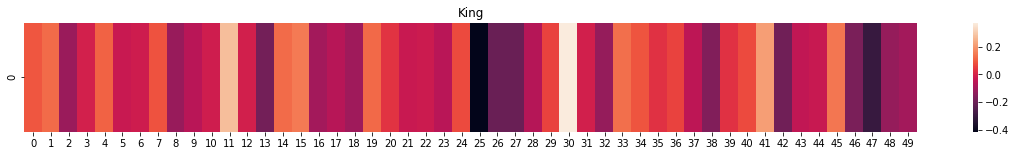

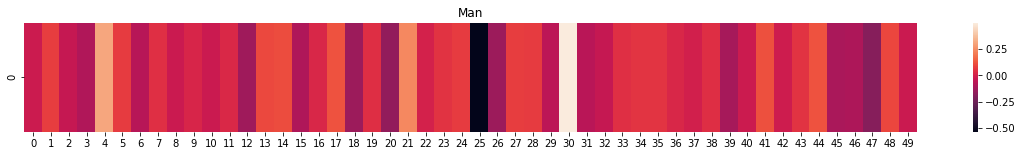

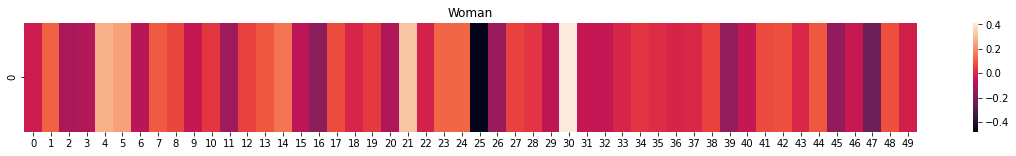

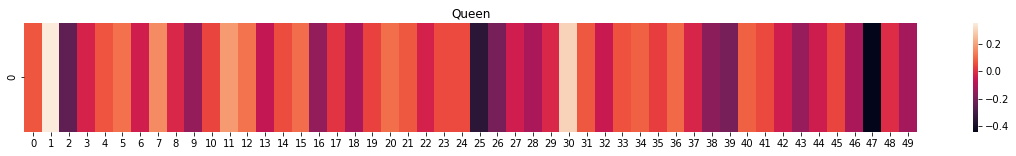

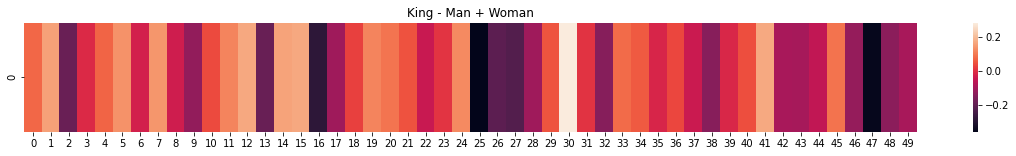

Similarity between
"King - Man + Woman" and "Queen": 0.8523603081703186


In [12]:
# Plot some vectors using heatmap

ut.plot_1d_heatmap(glove_vectors.query("king"), "King")
ut.plot_1d_heatmap(glove_vectors.query("man"), "Man")
ut.plot_1d_heatmap(glove_vectors.query("woman"), "Woman")
ut.plot_1d_heatmap(glove_vectors.query("queen"), "Queen")
ut.plot_1d_heatmap(glove_vectors.query("king") - glove_vectors.query("man") + glove_vectors.query("woman"), "King - Man + Woman")

print("Similarity between\n\"King - Man + Woman\" and \"Queen\": {}".format(ut.similarity_between_docs(glove_vectors.query("king") + glove_vectors.query("woman") - glove_vectors.query("man"), glove_vectors.query("queen"), is_1d=True)))

## Contextual Word Embeddings
These algoirtms also take the context of the word in some sentence while generating the Embeddings

1. AllenAI's ELMo
2. Facebook's BERT

### AllenAI's ELMo

In [13]:
elmo_vecs = pym.Magnitude('./vectors/elmo_2x1024_128_2048cnn_1xhighway_weights.magnitude')

ELMo generates embedding of a word based on its context. So we need to provide a full sentence in order to get the embedding of some word.

In [14]:
# Returns: an array of size (9 (number of words) x 768 (3 ELMo components concatenated))
sen1  = elmo_vecs.query(["yes", "they", "are", "right"])
sen2 = elmo_vecs.query(["go", "to", "your", "right"])

In [15]:
right1 = sen1[-1]
right2 = sen2[-1]

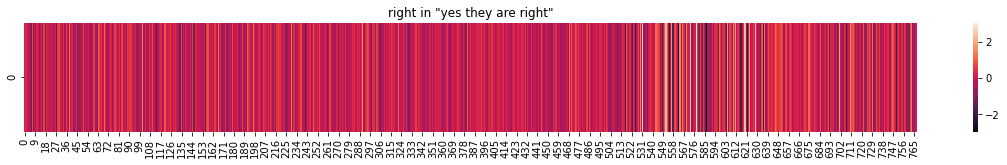

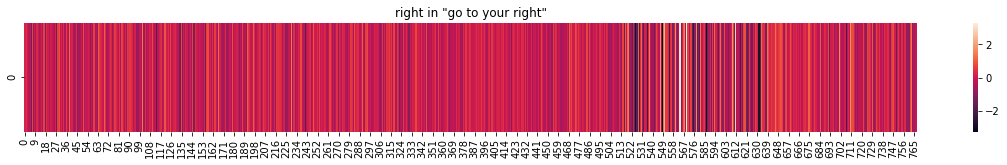

In [18]:
ut.plot_1d_heatmap(right1, name="right in \"yes they are right\"")
ut.plot_1d_heatmap(right2, name="right in \"go to your right\"")

In [19]:
print("Simialrity between \"right\" from sentence 1 & 2:\t{}".format(ut.similarity_between_docs(right1, right2, is_1d=True)))
print("Simialrity between \"right\" from sentence 1 only:\t{}".format(ut.similarity_between_docs(right1, right1, is_1d=True)))
print("Simialrity between \"right\" from sentence 2 only:\t{}".format(ut.similarity_between_docs(right2, right2, is_1d=True)))

Simialrity between "right" from sentence 1 & 2:	0.7283329963684082
Simialrity between "right" from sentence 1 only:	0.9999998807907104
Simialrity between "right" from sentence 2 only:	1.0
